# Portuguese governmental analysis of mathematics results

The educational system plays a crucial role in shaping a nation’s future by nurturing the next generation. A robust education system that provides students with a strong foundation in core subjects is vital for individual and collective prosperity. In Portugal, mathematical competency has been identified as an area needing improvement. Recent assessments have indicated that many Portuguese students struggle with mathematics, performing below average on standardized tests compared to other developed nations.

To strengthen math proficiency across Portugal’s student population, the government has undertaken a comprehensive analysis of mathematics performance in secondary schools. By reviewing a rich dataset tracking individual student variables alongside academic results, they aim to identify the most prevalent factors shared among students who fail mathematics courses. The impetus is that pinpointing commonalities will allow educators to better predict which students will need extra support and enable them to provide targeted interventions.

Ultimately, this initiative aims to critique Portugal’s math education framework itself and reshape the system to elevate standards nationwide. By focusing remediation efforts on struggling students earlier, the government hopes to bolster math skills and cultivate a generation of youth equipped to help advance Portugal as a hub of innovation. This report introduces to the government’s findings and recommendations for reform derived from their analysis of student mathematics performance across two selected schools.

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution

In [3]:
# Basic libraries to manipulate data
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import numpy as np  # Numpy for numerical computations
import pandas as pd  # Pandas for data manipulation
import plotly.express as px

In [4]:
np.random.seed(13)  # To ensure all the probabilistic things are reproducible

## Background on Data

#### i. Dataset
For this analysis, we take the data from the Kaggle website (https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics).

As per the dataset collector and owner, the survey encompassed the following parameters:
**Block 1: School report**
School reports gave a grade on 20 with a passing grade of 10.

**Block 2: Variables**
This part contains demographics, social, parent, and school-related features

#### ii. Scope & Procedures
This analysis is based on data collected from 395 students across two Portuguese schools. The survey, conducted from 2005 to 2006, included participants of any age or background. The questionnaire comprised a mix of multiple-choice, yes-or-no, and 1-5 scoring questions designed to receive structured responses.

## Normalizing Data

In [5]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
math_filename = "student_math_clean.csv"

# Read the CSV files and create backup copies
math_df_data = pd.read_csv(data_path + math_filename)

# Create working copies of the dataframes for analysis
math_df = math_df_data.copy()

In [6]:
# Check the first 10 rows
math_df.head(10)

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
5,6,GP,M,16,Urban,Less than or equal to 3,Living together,higher education,secondary education,services,...,5,4,2,1,2,5,10,15,15,15
6,7,GP,M,16,Urban,Less than or equal to 3,Living together,5th to 9th grade,5th to 9th grade,other,...,4,4,4,1,1,3,0,12,12,11
7,8,GP,F,17,Urban,Greater than 3,Apart,higher education,higher education,other,...,4,1,4,1,1,1,6,6,5,6
8,9,GP,M,15,Urban,Less than or equal to 3,Apart,secondary education,5th to 9th grade,services,...,4,2,2,1,1,1,0,16,18,19
9,10,GP,M,15,Urban,Greater than 3,Living together,secondary education,higher education,other,...,5,5,1,1,1,5,0,14,15,15


In [7]:
# Check structure of the dataset
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

The index comprises 395 entries, ranging from 0 to 394.

We can also see that most dtypes are objects or integers. Furthermore, while analyzing the first 10 rows, we have a better overview of what each row represents and the type of data it contains. We will start normalizing the dataset to ensure all the data is clean and usable.

In [8]:
# New function to try to convert variables to floats
def find_non_convertible_floats(series):
    non_convertibles = set()
    for item in series:
        try:
            float(item)  # Try converting to float
        except ValueError:
            non_convertibles.add(item)  # Add to set if conversion fails
    return non_convertibles


In [9]:
# Overview of the Age variable
find_non_convertible_floats(math_df['age'])
math_df['age'].value_counts(dropna=False)

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [10]:
# Change dtype of the variable Age
math_df['age']=math_df['age'].astype(float)

In [11]:
# Overview of the class failure variable
find_non_convertible_floats(math_df['class_failures'])
math_df['class_failures'].value_counts(dropna=False)

class_failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

In [12]:
# Change dtype of the variable class failure
math_df['class_failures']=math_df['class_failures'].astype(float)

In [13]:
# Repeat for other variables that are numerical
for col in ['family_relationship', 'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_1', 'grade_2', 'final_grade']:
    print(math_df[col].value_counts(dropna=False))

family_relationship
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64
free_time
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64
social
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64
weekday_alcohol
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64
weekend_alcohol
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64
health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64
absences
0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64
grade_1
10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     

In [14]:
# Assign dtype float to variables
for col in ['family_relationship', 'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_1', 'grade_2', 'final_grade']:
    math_df[col]=math_df[col].astype(float)

In [15]:
# Overview variable family size
math_df['family_size'].unique()

array(['Greater than 3', 'Less than or equal to 3'], dtype=object)

In [16]:
# Normalize variable family size
math_df['family_size']=math_df['family_size'].str.lower()
math_df['family_size']=math_df['family_size'].str.strip()

In [17]:
# Assign value to new dictionary
dict_replace={'less than or equal to 3':0,'greater than 3':1}

In [18]:
# Replace the values inside family size
math_df['family_size'] = math_df['family_size'].replace(dict_replace)
math_df['family_size']

0      1
1      1
2      0
3      1
4      1
      ..
390    0
391    0
392    1
393    0
394    0
Name: family_size, Length: 395, dtype: int64

In [19]:
# Change dtype of variable family size
math_df['family_size']=math_df['family_size'].astype(float)

In [20]:
# Overview variable mother_education
math_df['mother_education'].unique()

array(['higher education', 'primary education (4th grade)',
       'secondary education', '5th to 9th grade', 'none'], dtype=object)

In [21]:
# Assign new value to dictionary
dict_replace={'none':0,'primary education (4th grade)':1,'5th to 9th grade':2, 'secondary education':3, 'higher education':4}

In [22]:
# Replace values in the variables and assign new dtype
for col in ['mother_education', 'father_education']:
    math_df[col] = math_df[col].replace(dict_replace)
    math_df[col]=math_df[col].astype(float)

In [23]:
# Overview variable travel time
math_df['travel_time'].unique()

array(['15 to 30 min.', '<15 min.', '30 min. to 1 hour', '>1 hour'],
      dtype=object)

In [24]:
# Assign new value to dictionary
dict_replace={'<15 min.':0,'15 to 30 min.':1,'30 min. to 1 hour':2, '>1 hour':3}

In [25]:
# Replace values in the variable and assign new dtype
math_df['travel_time'] = math_df['travel_time'].replace(dict_replace)
math_df['travel_time']=math_df['travel_time'].astype(float)

In [26]:
# Overview variable study time
math_df['study_time'].unique()

array(['2 to 5 hours', '5 to 10 hours', '<2 hours', '>10 hours'],
      dtype=object)

In [27]:
# Assign new value to dictionary
dict_replace={'<2 hours':0,'2 to 5 hours':1,'5 to 10 hours':2, '>10 hours':3}

In [28]:
# Replace values in the variable and assign new dtype
math_df['study_time'] = math_df['study_time'].replace(dict_replace)
math_df['study_time']=math_df['study_time'].astype(float)

In [29]:
# Check if all the numerical variable have changed dtype well
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             395 non-null    int64  
 1   school                 395 non-null    object 
 2   sex                    395 non-null    object 
 3   age                    395 non-null    float64
 4   address_type           395 non-null    object 
 5   family_size            395 non-null    float64
 6   parent_status          395 non-null    object 
 7   mother_education       395 non-null    float64
 8   father_education       395 non-null    float64
 9   mother_job             395 non-null    object 
 10  father_job             395 non-null    object 
 11  school_choice_reason   395 non-null    object 
 12  guardian               395 non-null    object 
 13  travel_time            395 non-null    float64
 14  study_time             395 non-null    float64
 15  class_

As shown above, all the numerical variables other than the primary key (student id), which is kept as an integer, have been converted to floats.
We will now continue with the categorical variables.

In [30]:
# Overview variable school
math_df['school'].value_counts(dropna=False) 

school
GP    349
MS     46
Name: count, dtype: int64

In [31]:
# Assign new dtype
math_df['school']=math_df['school'].astype('category')

In [32]:
# Overview other future categorical variables
for col in ['sex','address_type','parent_status','mother_job','father_job','school_choice_reason','guardian','school_support','family_support','extra_paid_classes','activities','nursery_school','higher_ed','internet_access','romantic_relationship']:
    print(math_df[col].value_counts(dropna=False))

sex
F    208
M    187
Name: count, dtype: int64
address_type
Urban    307
Rural     88
Name: count, dtype: int64
parent_status
Living together    354
Apart               41
Name: count, dtype: int64
mother_job
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
father_job
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
school_choice_reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64
guardian
mother    273
father     90
other      32
Name: count, dtype: int64
school_support
no     344
yes     51
Name: count, dtype: int64
family_support
yes    242
no     153
Name: count, dtype: int64
extra_paid_classes
no     214
yes    181
Name: count, dtype: int64
activities
yes    201
no     194
Name: count, dtype: int64
nursery_school
yes    314
no      81
Name: count, dtype: int64
higher_ed
yes    375
no      20
Name: count, dtype: int6

In [33]:
# Change dtypes
for col in ['sex','address_type','parent_status','mother_job','father_job','school_choice_reason','guardian','school_support','family_support','extra_paid_classes','activities','nursery_school','higher_ed','internet_access','romantic_relationship']:
    math_df[col]=math_df[col].astype('category')

In [34]:
# Check if all the categorical variable have changed dtype well
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   student_id             395 non-null    int64   
 1   school                 395 non-null    category
 2   sex                    395 non-null    category
 3   age                    395 non-null    float64 
 4   address_type           395 non-null    category
 5   family_size            395 non-null    float64 
 6   parent_status          395 non-null    category
 7   mother_education       395 non-null    float64 
 8   father_education       395 non-null    float64 
 9   mother_job             395 non-null    category
 10  father_job             395 non-null    category
 11  school_choice_reason   395 non-null    category
 12  guardian               395 non-null    category
 13  travel_time            395 non-null    float64 
 14  study_time             395 non-null    flo

The next step is to check to quality of the data.

In [35]:
# Check for Nan values
math_df.isna().sum()

student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64

In [36]:
# Check for duplicates
math_df[math_df.duplicated()]

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade


In [37]:
# Delete duplicates
math_df.drop_duplicates()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18.0,Urban,1.0,Apart,4.0,4.0,at_home,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,2,GP,F,17.0,Urban,1.0,Living together,1.0,1.0,at_home,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,3,GP,F,15.0,Urban,0.0,Living together,1.0,1.0,at_home,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,4,GP,F,15.0,Urban,1.0,Living together,4.0,2.0,health,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,5,GP,F,16.0,Urban,1.0,Living together,3.0,3.0,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20.0,Urban,0.0,Apart,2.0,2.0,services,...,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0
391,392,MS,M,17.0,Urban,0.0,Living together,3.0,1.0,services,...,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0,16.0
392,393,MS,M,21.0,Rural,1.0,Living together,1.0,1.0,other,...,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
393,394,MS,M,18.0,Rural,0.0,Living together,3.0,2.0,services,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0,10.0


### Checking for Outliers

We check the frequencies of all numerical variables while looking for abnormalities. 
Variables that do not detail the whole picture are double-checked with a boxplot.
We can identify any statistically significant differences by visualizing the distribution variables with a boxplot.

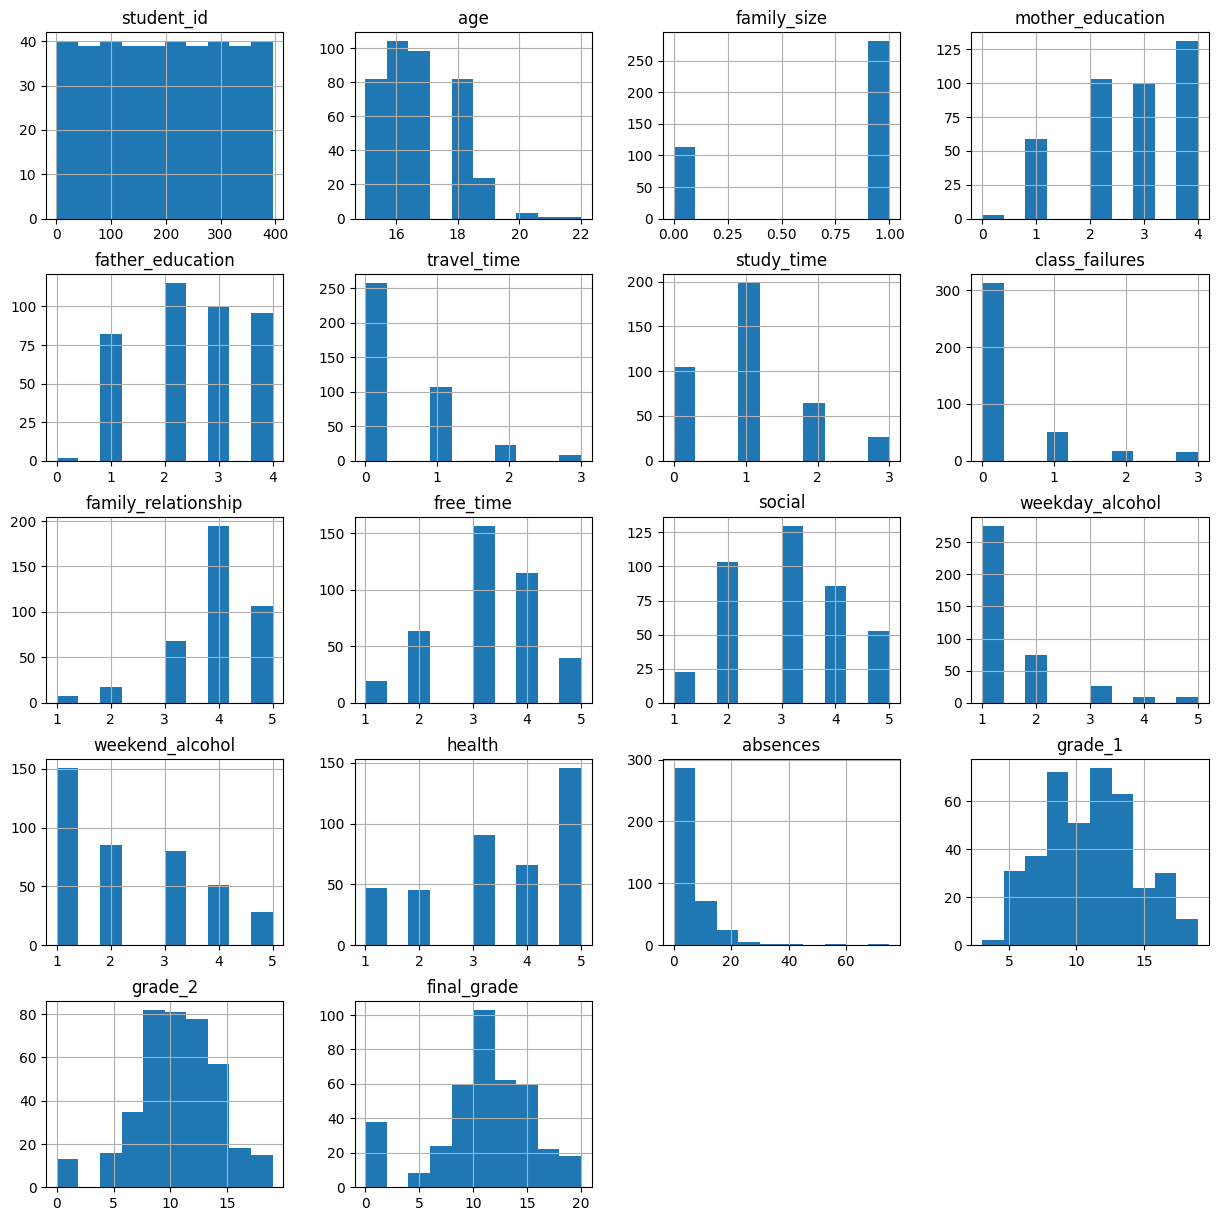

In [38]:
# Overview distribution of numerical variables
numeric_math_df=math_df.select_dtypes(np.number) 
cols_wo_freq=numeric_math_df.columns[~numeric_math_df.columns.str.startswith('Freq')]
numeric_math_df=numeric_math_df.loc[:,cols_wo_freq]

numeric_math_df.hist(figsize=(15,15));

In [39]:
# Boxplot of variable Age
px.box(math_df,y='age')

In [40]:
# Boxplot of variable absences
px.box(math_df, y='absences')

In [41]:
# Check into more details rows with high absences
math_df.query('absences>50')

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
74,75,GP,F,16.0,Urban,1.0,Living together,3.0,3.0,other,...,4.0,3.0,3.0,2.0,4.0,5.0,54.0,11.0,12.0,11.0
183,184,GP,F,17.0,Urban,0.0,Living together,3.0,3.0,other,...,5.0,3.0,3.0,2.0,3.0,1.0,56.0,9.0,9.0,8.0
276,277,GP,F,18.0,Rural,1.0,Apart,3.0,2.0,other,...,4.0,1.0,1.0,1.0,1.0,5.0,75.0,10.0,9.0,9.0


We decided to check on the absences' outliers and look deeper to see if the data was usable. We decided to keep the data.

In [43]:
# Save dtypes
types=math_df.dtypes
types.to_csv('./data/dtypes_math.csv')

In [44]:
# Save cleaned file
math_df.to_csv('./data/math.csv',
                 index=False)

We saved the cleaned dataset and its dtypes to use them in our analysis. Hereby, we finish the normalization.